In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Open and load the data from a JSON file
with open('test_dir/results.json', 'r') as f:
    data_dict = json.load(f)

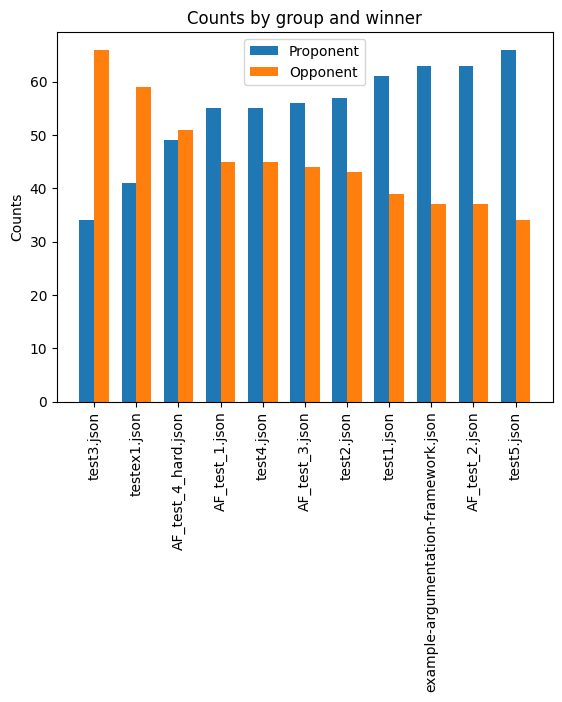

In [2]:
# Initialize a dictionary to hold the counts
counts = {key: {'Proponent': 0, 'Opponent': 0} for key in data_dict.keys()}

# Count the winners
for key, games in data_dict.items():
    for game in games:
        counts[key][game['winner']] += 1

# Prepare data for plotting
labels = list(counts.keys())
proponent_counts = [value['Proponent'] for value in counts.values()]
opponent_counts = [value['Opponent'] for value in counts.values()]

# Sort labels by 'Proponent' counts
sorted_indices = np.argsort(proponent_counts)
labels = np.array(labels)[sorted_indices]
proponent_counts = np.array(proponent_counts)[sorted_indices]
opponent_counts = np.array(opponent_counts)[sorted_indices]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

# Add bars for 'Proponent' and 'Opponent'
rects1 = ax.bar(x - width/2, proponent_counts, width, label='Proponent')
rects2 = ax.bar(x + width/2, opponent_counts, width, label='Opponent')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Counts by group and winner')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation='vertical')  # Rotate labels to vertical
ax.legend()

plt.savefig('counts_by_group_and_winner.png')

# Show the plot
plt.show()

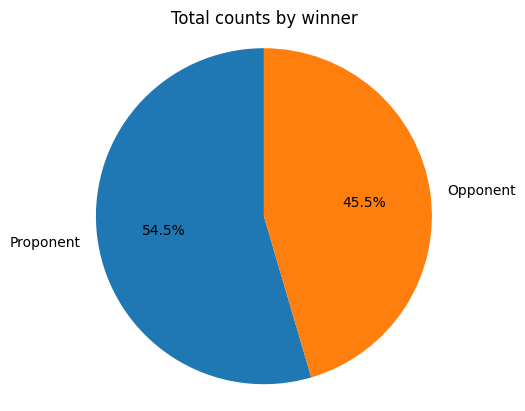

In [3]:
# Initialize a dictionary to hold the counts
total_counts = {'Proponent': 0, 'Opponent': 0}

# Count the winners
for key, games in data_dict.items():
    for game in games:
        total_counts[game['winner']] += 1

# Prepare data for plotting
labels = list(total_counts.keys())
counts = list(total_counts.values())

fig, ax = plt.subplots()

# Create a pie chart
ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Add a title
ax.set_title('Total counts by winner')

plt.savefig('pie_chart.png')

# Show the plot
plt.show()